In [1]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import numpy as np

import matplotlib.pyplot as plt

#### Load the dataset

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
np.random.seed(142)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Scale the data

In [4]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Classify using Decision trees as a baseline

In [5]:
clf = DecisionTreeClassifier(criterion="entropy")

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
y_pred = clf.predict(X_test)

### Performance

In [7]:
def score(true : np.ndarray, pred : np.ndarray) -> list :
 
    acc = np.round(metrics.accuracy_score(true, pred),7)
    rec = np.round(metrics.recall_score(true, pred), 7)
    prec = np.round(metrics.precision_score(true, pred), 7)
    f1 = np.round(metrics.f1_score(true, pred), 7)
    
    print(f"ACC  {metrics.accuracy_score(true, pred):.6f}")
    print(f"REC  {metrics.recall_score(true, pred):.6f}")
    print(f"PREC {metrics.precision_score(true, pred):.6f}")
    print(f"F1   {metrics.f1_score(true, pred):.6f}")
    
    return [acc, rec, prec, f1]


In [8]:
score(y_test, y_pred)

ACC  0.935673
REC  0.932039
PREC 0.960000
F1   0.945813


[0.9356725, 0.9320388, 0.96, 0.9458128]

## **Bagging**

In [9]:
bag = BaggingClassifier(base_estimator=clf, bootstrap=True, oob_score=True, n_estimators=50)

bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=50, oob_score=True)

In [10]:
print("Scores after bagging", end='\n\n')
y_pred_bag = bag.predict(X_test)

bag_scores = score(y_test, y_pred_bag)

Scores after bagging

ACC  0.976608
REC  0.980583
PREC 0.980583
F1   0.980583


### Compare with Random Forest

In [11]:
clf_rf =  RandomForestClassifier(n_estimators=50, criterion='entropy')

clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [12]:
y_pred_rf = clf_rf.predict(X_test)

rf_scores = score(y_test, y_pred_rf)

ACC  0.959064
REC  0.970874
PREC 0.961538
F1   0.966184


### Barchart to compare 2 models

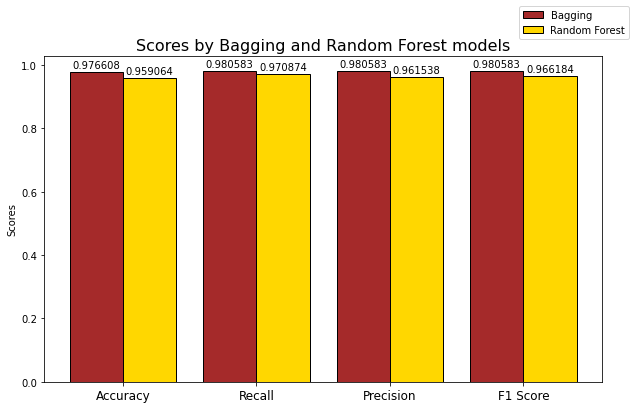

In [14]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()


plt.rcParams["figure.figsize"] = (10,6)

rects1 = ax.bar(x - width/2, bag_scores, width, label='Bagging', color="brown", edgecolor="black")
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color="gold",edgecolor="black")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Bagging and Random Forest models', fontsize=16)
ax.set_xticks(x, labels, fontsize=12)
ax.legend(bbox_to_anchor=(.85, 1.05), loc=3, borderaxespad=0.)

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

plt.show()